## In this notebook we study the following single species coagulation reaction with sopantaneous creation and destruction:

\begin{equation}
\begin{split}
    A &\leftrightharpoons_{k_2}^{k_1} \emptyset \\
    B &\leftrightharpoons_{k_2}^{k_1} \emptyset \\
    C &\leftrightharpoons_{k_2}^{k_1} \emptyset \\
\end{split}
\end{equation}

\begin{equation}
    A + B\rightarrow^{k_3} C    
\end{equation}

## Starting from Poisson initial conditions. 

### From the following paper: 
##### M. Harsh and P. Sollich, Accurate Dynamics from Self-Consistent Memory in Stochastic Chemical Reactions with Small Copy Numbers, J. Phys. A: Math. Theor. (2023).

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys

sys.path.append('../')
sys.path.append('../src')

from src import cheMASTER
from src.sbr import AAA,ABC

import matplotlib

#from importlib import reload
#reload(AAA)

In [35]:
plt.rcParams.update({'text.usetex':False,
                     'xtick.labelsize': 20,
                     'ytick.labelsize': 20,
                     'xtick.major.width':3,
                     'ytick.major.width':3,
                     'xtick.major.size':10,
                     'ytick.major.size':10,
                     'xtick.direction':'in',
                     'ytick.direction':'in',

'font.size': 30,
'figure.autolayout': True,
'figure.figsize': (10,5),
'axes.titlesize' : 20,
'axes.labelsize' : 20,
'lines.linewidth' : 3,
'lines.markersize' : 3,
'legend.fontsize': 13,
'mathtext.fontset': 'stix',
'axes.linewidth':3,
'font.family': 'Arial'})

## Setting up the reaction stoichiometry, rates and initial conditions

In [6]:
# Setting up the reactions and the parameters:

num_species     = 3 #Number of species in the reaction system
num_interaction = 1 # Number of interating reactions in the Hamiltonian
num_reactions   = 2*num_species + num_interaction # This counts the total number of possible reactions in the system.
                                        # We have 2N creation and destruction reactions and the rest interaction reactions
# k1,A = 8, k2,A = 3, k1,B =8, k2,B =2, k1,C =3, k2,C =1.5 and k3 =0.5.

# Rate constants for the reaction system: [k1 is Creation and k2 is Destruction]
k1 = np.array([4,4,3]) #len must be equal to num_species
k2 = np.array([3,2,3]) #len must be equal to num_species

# Interaction reactions:
k3 = np.array([1.])         #len must be equal to num_interactions    
s_i,r_i = np.zeros([num_interaction,num_species]),np.zeros([num_interaction,num_species])
rxn_par = [k1,k2,k3]

#Write this for all reactions in the interacting Hamiltonian corresponding to the reaction rate k3
s_i[0] = [0,0,1] 
r_i[0] = [1,1,0]
#s_i[1] = [1,1,0]
#r_i[1] = [0,0,1]

#The initial concentration of the species. 
#Note: for Gillespie we start each trajectory from a Poisonian random variable with mean as the initial conc.below:
initial_values = k1/k2

### Running the dynamics with Master Equation

In [7]:
sys = cheMASTER.chemical_system_class(num_interaction,num_species,rxn_par,r_i,s_i)
cheMASTER.initialize_dynamics(sys,initial_values,0,1.,0.001)
cheMASTER.runDynamics(sys,max_num=[12,15,12],method='Euler')

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 211.32it/s]


### Master Eqn with Eignevalues

In [9]:
sysEV = cheMASTER.chemical_system_class(num_interaction,num_species,rxn_par,r_i,s_i)
cheMASTER.initialize_dynamics(sysEV,initial_values,0,1.,0.001)
cheMASTER.runDynamics(sysEV,max_num=[12,15,12],method='Eigenvalue',variance=True)#,selfCorrelator_tau='connected')

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:46<00:00, 21.63it/s]


### Moment Closure

In [28]:
momentClosure_alpha1 = np.loadtxt("../data/momentClosure/ABC_single/alpha_1.csv")

### Run the different diagrammatic approximations:

In [12]:
y_mak,resp_mak,time_grid_mak = \
ABC.integrate_mak_ABC(k1,k2,k3,alpha=1.,init_time=0.,final_time=1.,dt=0.001,initial_values=initial_values)

In [16]:
y_alpha2_SR,resp_alpha2_SR,time_grid_alpha2_SR = \
ABC.integrate_alpha2_singleR_ABC(k1,k2,k3,alpha=1.,init_time=0.,final_time=1.,dt=0.001,initial_values=initial_values)

In [17]:
y_alpha2_bare,resp_alpha2_bare,time_grid_alpha2_bare = \
ABC.integrate_alpha2_bare(k1,k2,k3,alpha=1.,init_time=0.,final_time=1.,dt=0.001,initial_values=initial_values)

In [18]:
y_ALL_bare,resp_ALL_bare,time_grid_ALL_bare = \
ABC.integrate_All_bare(k1,k2,k3,alpha=1.,init_time=0.,final_time=1.,dt=0.001,initial_values=initial_values)

In [19]:
y_alpha2,resp_alpha2,time_grid_alpha2 = \
ABC.integrate_alpha2_ABC(k1,k2,k3,alpha=1.,init_time=0.,final_time=1.,dt=0.001,initial_values=initial_values)

In [23]:
y_ALL,resp_ALL,time_grid_ALL = \
ABC.integrate_All_ABC(k1,k2,k3,alpha=1.,init_time=0.,final_time=1.,dt=0.001,initial_values=initial_values)

In [22]:
y_ALL_SR,resp_ALL_SR,time_grid_ALL_SR = \
ABC.integrate_All_singleR_ABC(k1,k2,k3,alpha=1.,init_time=0.,final_time=1.,dt=0.001,initial_values=initial_values)

In [31]:
y_emre,time_grid_emre,eps_emre,var_emre = \
ABC.emre_ABC(k1,k2,k3,alpha=1.,init_time=0.,final_time=1.,dt=0.001,initial_values=initial_values)

In [25]:
cOL = plt.rcParams['axes.prop_cycle'].by_key()['color']

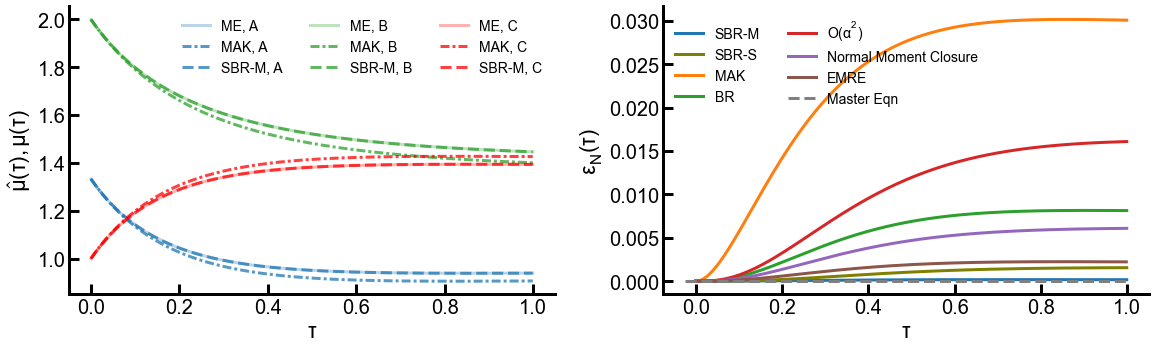

In [36]:
fig = plt.figure(figsize=(15,4))
ax1 = fig.add_axes([0, 0, 0.45, 1])
ax4 = fig.add_axes([0.55, 0., 0.45, 1])

COL_ABC = cOL[:3].copy()
COL_ABC[1] = cOL[2]
COL_ABC[2] = 'red'

#COL_ABC = ['blue','green','red']

for i in range(num_species):
    ax1.plot(sys.timeGrid,sys.y[i],alpha=0.3,c=COL_ABC[i])
    ax1.plot(time_grid_mak,y_mak[i],linestyle=(0, (3, 1, 1, 1)),alpha=0.75,c=COL_ABC[i])
    ax1.plot(time_grid_mak,y_ALL[i],linestyle='--',alpha=0.75,c=COL_ABC[i])

ax1.legend(['ME, A','MAK, A','SBR-M, A','ME, B','MAK, B','SBR-M, B','ME, C','MAK, C','SBR-M, C'],frameon=False, fontsize=14,ncol=3)

ax1.set_xlabel(r'$\mathregular{\tau}$',fontsize=22)
ax1.set_ylabel(r'$\mathregular{\hat{\mu}(\tau),\mu(\tau)}$',fontsize=22)
#ax[i].yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(.1))
#ax1.legend(bbox_to_anchor=(0.95, 0.95), loc=1, frameon=False, fontsize=14)
#ax1.legend(loc=0, frameon=False, fontsize=14)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax4.plot(time_grid_ALL,np.mean(abs(y_ALL/sys.y-1),axis=0),label = 'SBR-M')
ax4.plot(time_grid_ALL,np.mean(abs(y_ALL_SR/sys.y-1),axis=0),label = 'SBR-S',c='olive')
ax4.plot(time_grid_ALL,np.mean(abs(y_mak/sys.y-1),axis=0),label = 'MAK')
ax4.plot(time_grid_ALL,np.mean(abs(y_ALL_bare/sys.y-1),axis=0),label = 'BR')
ax4.plot(time_grid_ALL,np.mean(abs(y_alpha2_bare/sys.y-1),axis=0),label = r'$\mathregular{O(\alpha^2)}$')
ax4.plot(momentClosure_alpha1[0,:-1],np.mean(abs(momentClosure_alpha1[1:4,:-1]/sys.y-1),axis=0),label= 'Normal Moment Closure')
ax4.plot(time_grid_emre[0:-1],np.mean(abs((y_emre+eps_emre)/sys.y-1),axis=0)[0:-1],label = 'EMRE')
ax4.hlines(0,-0.025,time_grid_ALL[-1],linestyles='dashed',colors='gray',label = 'Master Eqn')

ax4.set_xlabel(r'$\mathregular{\tau}$',fontsize=22)
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
#ax4.set_ylabel(r'$\mathregular{\frac{1}{N}\sum_i |\hat{\mu}_i(\tau)/\mu_i(\tau) - 1|}$',fontsize=22)
ax4.set_ylabel(r'$\mathregular{\epsilon_N(\tau)}$',fontsize=22)
ax4.legend(frameon=False, fontsize=14,ncol=2)

### Change the rate $k_3$ and plot the result systematically:

In [38]:
alpha_range = [0.1,1.,10.,100.,1000.]
dt_range    = ([0.02,0.002,0.0002,0.00002,0.000002])
ftime_range = [20.,2.,0.2,0.02,0.002]

In [63]:
SYSEV1 = []
for i in range(len(alpha_range)):
    rxn_par[2][0] = alpha_range[i] 
    SYSEV1.append(cheMASTER.chemical_system_class(num_interaction,num_species,rxn_par,r_i,s_i))
    cheMASTER.initialize_dynamics(SYSEV1[i],initial_values,0,ftime_range[i],dt_range[i])
    cheMASTER.runDynamics(SYSEV1[i],max_num=[10,12,10],method='Eigenvalue')
rxn_par[2][0] = k3[0]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1001/1001 [00:12<00:00, 78.00it/s]


In [42]:
Y_ALL,RESP_ALL,TG_ALL = [],[],[]

for i in range(len(alpha_range)):

    y,resp,time_grid = ABC.integrate_All_ABC(k1,k2,k3,alpha=alpha_range[i],init_time=0.,final_time=ftime_range[i],dt=dt_range[i],initial_values=initial_values)
    Y_ALL.append(y)
    RESP_ALL.append(resp)
    TG_ALL.append(time_grid)

In [43]:
Y_MAK,RESP_MAK,TG_MAK = [],[],[]

for i in range(len(alpha_range)):

    y,resp,time_grid = ABC.integrate_mak_ABC(k1,k2,k3,alpha=alpha_range[i],init_time=0.,final_time=ftime_range[i],dt=dt_range[i],initial_values=initial_values)
    Y_MAK.append(y)
    RESP_MAK.append(resp)
    TG_MAK.append(time_grid)


In [44]:
Y_ALL_SR,RESP_ALL_SR,TG_ALL_SR = [],[],[]

for i in range(len(alpha_range)):

    y,resp,time_grid = ABC.integrate_All_singleR_ABC(k1,k2,k3,alpha=alpha_range[i],init_time=0.,final_time=ftime_range[i],dt=dt_range[i],initial_values=initial_values)
    Y_ALL_SR.append(y)
    RESP_ALL_SR.append(resp)
    TG_ALL_SR.append(time_grid)

In [45]:
Y_ALL_bare,RESP_ALL_bare,TG_ALL_bare = [],[],[]

for i in range(len(alpha_range)):

    y,resp,time_grid = ABC.integrate_All_bare(k1,k2,k3,alpha=alpha_range[i],init_time=0.,final_time=ftime_range[i],dt=dt_range[i],initial_values=initial_values)
    Y_ALL_bare.append(y)
    RESP_ALL_bare.append(resp)
    TG_ALL_bare.append(time_grid)

In [46]:
Y_ALPHA2_bare,RESP_ALPHA2_bare,TG_ALPHA2_bare = [],[],[]

for i in range(len(alpha_range)):

    y,resp,time_grid = ABC.integrate_alpha2_bare(k1,k2,k3,alpha=alpha_range[i],init_time=0.,final_time=ftime_range[i],dt=dt_range[i],initial_values=initial_values)
    Y_ALPHA2_bare.append(y)
    RESP_ALPHA2_bare.append(resp)
    TG_ALPHA2_bare.append(time_grid)

In [47]:
Y_EMRE,TG_EMRE,EPS_EMRE,VAR_EMRE = [],[],[],[]

for i in range(len(alpha_range)):

    y,time_grid,eps,var = ABC.emre_ABC(k1,k2,k3,alpha=alpha_range[i],init_time=0.,final_time=ftime_range[i],dt=dt_range[i],initial_values=initial_values)
    Y_EMRE.append(y+eps)
    VAR_EMRE.append(var)
    TG_EMRE.append(time_grid)



In [54]:
MomentClosure = []
for i in range(len(alpha_range)):
        MomentClosure.append(np.loadtxt("../data/momentClosure/ABC_paper/alpha_"+str(i+1)+".csv"))

In [64]:
## Take all of the trajectory
## Make the sum of relative deviation along the trajectory
Y_ALL_rel      = np.zeros([num_species+1,len(alpha_range)])
Y_ALL_bare_rel = np.zeros([num_species+1,len(alpha_range)])
Y_MAK_rel      = np.zeros([num_species+1,len(alpha_range)])
Y_ALL_SR_rel   = np.zeros([num_species+1,len(alpha_range)])
Y_ALPHA2_bare_rel  = np.zeros([num_species+1,len(alpha_range)])
momentClosure_rel      = np.zeros([num_species+1,len(alpha_range)])
Y_EMRE_rel      = np.zeros([num_species+1,len(alpha_range)])
fi                 = np.zeros([len(alpha_range)],dtype=int)

for i in range(len(alpha_range)):
    fi[i] = len(TG_ALL[i])
    
    for j in range(num_species):
        momentClosure_rel[j,i] = np.mean(np.abs((MomentClosure[i][j+1,:fi[i]]-SYSEV1[i].y[j,:fi[i]])/SYSEV1[i].y[j,:fi[i]]),axis=0,keepdims=False)
        Y_ALL_rel[j,i]         = np.mean(np.abs((Y_ALL[i][j,:fi[i]]-SYSEV1[i].y[j,:fi[i]])/SYSEV1[i].y[j,:fi[i]]),axis=0,keepdims=False)
        Y_ALL_bare_rel[j,i]    = np.mean(np.abs((Y_ALL_bare[i][j,:fi[i]]-SYSEV1[i].y[j,:fi[i]])/SYSEV1[i].y[j,:fi[i]]),axis=0,keepdims=False)                          
        Y_MAK_rel[j,i]         = np.mean(np.abs((Y_MAK[i][j,:fi[i]]-SYSEV1[i].y[j,:fi[i]])/SYSEV1[i].y[j,:fi[i]]),axis=0,keepdims=False)
        Y_ALL_SR_rel[j,i]      = np.mean(np.abs((Y_ALL_SR[i][j,:fi[i]]-SYSEV1[i].y[j,:fi[i]])/SYSEV1[i].y[j,:fi[i]]),axis=0,keepdims=False)                          
        Y_ALPHA2_bare_rel[j,i] = np.mean(np.abs((Y_ALPHA2_bare[i][j,:fi[i]]-SYSEV1[i].y[j,:fi[i]])/SYSEV1[i].y[j,:fi[i]]),axis=0,keepdims=False)
        Y_EMRE_rel[j,i]         = np.mean(np.abs((Y_EMRE[i][j,:fi[i]]-SYSEV1[i].y[j,:fi[i]])/SYSEV1[i].y[j,:fi[i]]),axis=0,keepdims=False)

for i in range(len(alpha_range)):
    
    momentClosure_rel[3,i]  = np.mean(momentClosure_rel[0:num_species,i])
    Y_ALL_rel[3,i]         = np.mean(Y_ALL_rel[0:num_species,i])
    Y_ALL_bare_rel[3,i]    = np.mean(Y_ALL_bare_rel[0:num_species,i])
    Y_MAK_rel[3,i]        = np.mean(Y_MAK_rel[0:num_species,i])
    Y_EMRE_rel[3,i]        = np.mean(Y_EMRE_rel[0:num_species,i])
    Y_ALL_SR_rel[3,i]      = np.mean(Y_ALL_SR_rel[0:num_species,i])                  
    Y_ALPHA2_bare_rel[3,i] = np.mean(Y_ALPHA2_bare_rel[0:num_species,i])
    

/usr/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/usr/lib/python3.11/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


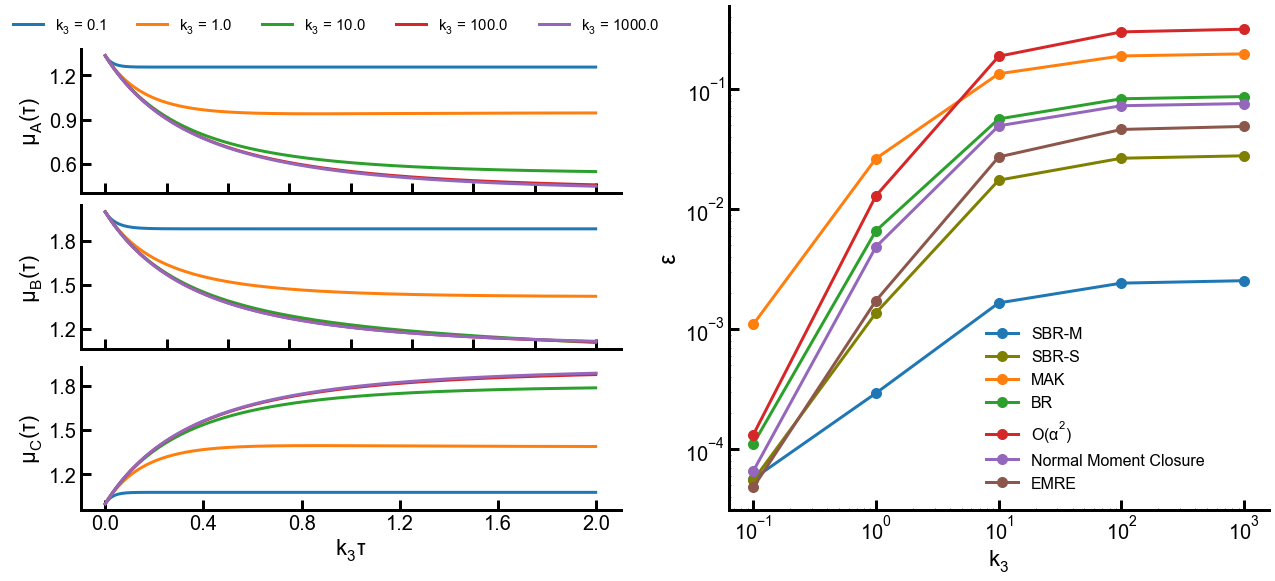

In [65]:
import matplotlib

fig = plt.figure(figsize=(15,7))

ax1  = fig.add_axes([0.,0, 0.5, 0.285])
ax11 = fig.add_axes([0.,0.32, 0.5, 0.285])
ax111 = fig.add_axes([0.,0.63, 0.5, 0.285])

for i in range(len(alpha_range)):
    ax1.plot(alpha_range[i]*SYSEV1[i].timeGrid,SYSEV1[i].y[2],label=r'$\mathregular{k_3}$ = ' + str(alpha_range[i]),linestyle='-',c=cOL[i])
    ax11.plot(alpha_range[i]*SYSEV1[i].timeGrid,SYSEV1[i].y[1],label=r'$\mathregular{k_3}$ = ' + str(alpha_range[i]),linestyle='-',c=cOL[i])
    ax111.plot(alpha_range[i]*SYSEV1[i].timeGrid,SYSEV1[i].y[0],label=r'$\mathregular{k_3}$ = ' + str(alpha_range[i]),linestyle='-',c=cOL[i])
    
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax11.spines['right'].set_visible(False)
ax11.spines['top'].set_visible(False)
ax111.spines['right'].set_visible(False)
ax111.spines['top'].set_visible(False)

ax1.set_xlabel(r'$\mathregular{k_3 \tau}$',fontsize=22)
ax1.set_ylabel(r'$\mathregular{\mu_C(\tau)}$',fontsize=22)
ax1.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(.4))

ax11.set_ylabel(r'$\mathregular{\mu_B(\tau)}$',fontsize=22)
ax111.set_ylabel(r'$\mathregular{\mu_A(\tau)}$',fontsize=22)
ax11.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(.3))
ax111.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(.3))
ax1.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(.3))

ax11.set(xticklabels=[])
ax111.set(xticklabels=[])

ax111.legend(bbox_to_anchor=(-0.15, 1.), loc='lower left',  frameon=False, fontsize=15,ncol=5)


ax2= fig.add_axes([0.60,0, 0.5, 1])

ax2.plot(alpha_range,Y_ALL_rel[3],'o-' ,    label = 'SBR-M',markersize=10)
ax2.plot(alpha_range,Y_ALL_SR_rel[3],'o-',  label = r'SBR-S',markersize=10,c='olive')
ax2.plot(alpha_range,Y_MAK_rel[3],'o-',          label = 'MAK',markersize=10)
ax2.plot(alpha_range,Y_ALL_bare_rel[3],'o-',  label = 'BR',markersize=10)
ax2.plot(alpha_range,Y_ALPHA2_bare_rel[3],'o-',  label = r'$\mathregular{O(\alpha^2)}$',markersize=10)
#ax2.plot(alpha_range,Y_ALPHA2_ALL_rel ,'o-',     label = r'$\mathregular{O(\alpha^2)}$ w/ dressed resp',markersize=10)
ax2.plot(alpha_range,momentClosure_rel[3],'o-',     label= 'Normal Moment Closure',markersize=10)
ax2.plot(alpha_range,Y_EMRE_rel[3],'o-',          label = 'EMRE',markersize=10)

ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax2.set_xlabel(r'$\mathregular{k_3}$',fontsize=22)
ax2.set_ylabel(r'$\mathregular{\epsilon}$',fontsize=24)

ax2.legend(bbox_to_anchor=(0.45, 0.01), loc='lower left', frameon=False, fontsize=16)

## Measure and plot Response functions:

In [60]:
sys_res = cheMASTER.chemical_system_class(num_interaction,num_species,rxn_par,r_i,s_i)
cheMASTER.initialize_dynamics(sys_res,initial_values,0,1.,0.01)
cheMASTER.runDynamics(sys_res,max_num=[10,12,10],method='Euler',measureResponse='finite-cross',\
                               measureResponse_par = [1.1,1])

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [04:46<00:00,  2.87s/it]


In [ ]:
corr_tau_ALL = np.zeros([num_species,num_species,len(time_grid_ALL),len(time_grid_ALL)])

for j in range(len(time_grid_ALL)):
    for k in range(len(time_grid_ALL)-j):
        corr_tau_ALL[:,:,k,j] = resp_ALL[:,:,k+j,j]#*y_ALL[:,j]

In [67]:
# In the other direction, that is as a function of $\tau'$:

respME_2  = np.copy(sys_res.Response) 
respALL_2 = np.copy(resp_ALL)
respMAK_2 = np.copy(resp_mak)
respALL_SR_2 = np.copy(resp_ALL_SR)

for j in range(len(time_grid_ALL)):
    for k in range(len(time_grid_ALL)-j):
        respALL_2[:,:,k,j] = respALL_2[:,:,k+j,j]
        respMAK_2[:,:,k,j] = respMAK_2[:,:,k+j,j]
        respALL_SR_2[:,:,k,j] = respALL_SR_2[:,:,k+j,j]
        
for j in range(len(sys_res.timeGrid)):
    for k in range(len(sys_res.timeGrid)-j):
        respME_2[:,:,k,j] = respME_2[:,:,k+j,j]

### Single Responses:

In [69]:
tau = np.array([0,200,400,600,800])
tau2 = np.array([0,20,40,60,80])

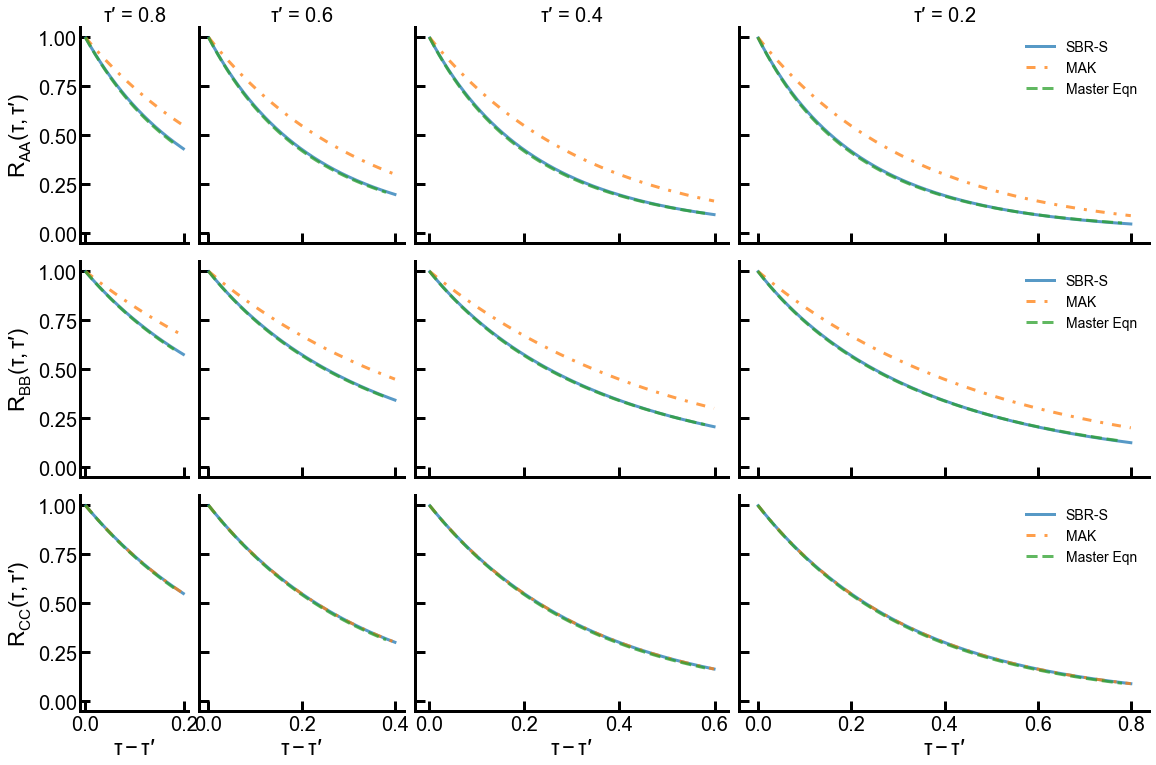

In [70]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_axes([0, 0.65, 0.1, 0.3])
ax2 = fig.add_axes([0.11, 0.65, 0.19, 0.3])
ax3 = fig.add_axes([0.31, 0.65, 0.29, 0.3])
ax4 = fig.add_axes([0.61, 0.65, 0.38, 0.3])

ax11 = fig.add_axes([0, 0.325, 0.1, 0.3])
ax22 = fig.add_axes([0.11, 0.325, 0.19, 0.3])
ax33 = fig.add_axes([0.31, 0.325, 0.29, 0.3])
ax44 = fig.add_axes([0.61, 0.325, 0.38, 0.3])

ax111 = fig.add_axes([0, 0., 0.1, 0.3])
ax222 = fig.add_axes([0.11, 0., 0.19, 0.3])
ax333 = fig.add_axes([0.31, 0., 0.29, 0.3])
ax444 = fig.add_axes([0.61, 0., 0.38, 0.3])

z=0
#axis= [ax1,ax2,ax3,ax4]
axis= [z,ax4,ax3,ax2,ax1]
axis11  = [z,ax44,ax33,ax22,ax11]
axis111 = [z,ax444,ax333,ax222,ax111]

skip=10
#for j in range(len(time_resp)):
#    axis[j].plot(sysEV_1.timeGrid[corr_tau_ALL[i,:,tau[j]]>0],corr_tau_ALL[i,corr_tau_ALL[i,:,tau[j]]>0,tau[j]]/corr_tau_ALL[i,0,tau[j]],'--')

for j in range(1,len(tau)):
    
    axis[j].plot(time_grid_ALL[1:len(time_grid_ALL)-tau[j]],respALL_SR_2[0,0,1:len(time_grid_ALL)-tau[j],tau[j]],'-',alpha=0.75,label='SBR-S',c=cOL[0])#,linewidth=8)
    axis11[j].plot(time_grid_ALL[1:len(time_grid_ALL)-tau[j]],respALL_SR_2[1,1,1:len(time_grid_ALL)-tau[j],tau[j]],'-',alpha=0.75,label='SBR-S',c=cOL[0])#,linewidth=8)
    axis111[j].plot(time_grid_ALL[1:len(time_grid_ALL)-tau[j]],respALL_SR_2[2,2,1:len(time_grid_ALL)-tau[j],tau[j]],'-',alpha=0.75,label='SBR-S',c=cOL[0])#,linewidth=8)
    
    axis[j].plot(time_grid_ALL[1:len(time_grid_ALL)-tau[j]],respMAK_2[0,0,1:len(time_grid_ALL)-tau[j],tau[j]],linestyle=(0, (3, 3, 1, 3)),alpha=0.75,label='MAK',c=cOL[1])
    axis11[j].plot(time_grid_ALL[1:len(time_grid_ALL)-tau[j]],respMAK_2[1,1,1:len(time_grid_ALL)-tau[j],tau[j]],linestyle=(0, (3, 3, 1, 3)),alpha=0.75,label='MAK',c=cOL[1])
    axis111[j].plot(time_grid_ALL[1:len(time_grid_ALL)-tau[j]],respMAK_2[2,2,1:len(time_grid_ALL)-tau[j],tau[j]],linestyle=(0, (3, 3, 1, 3)),alpha=0.75,label='MAK',c=cOL[1])
    
    #axis[j].plot(sys_res.timeGrid[1:len(sys_res.timeGrid)-tau2[j]],respME_2[0,0,1:len(sys_res.timeGrid)-tau2[j],tau2[j]],'--',alpha=0.75,label='Master Eqn',c=cOL[2])
    #axis11[j].plot(sys_res.timeGrid[1:len(sys_res.timeGrid)-tau2[j]],respME_2[1,1,1:len(sys_res.timeGrid)-tau2[j],tau2[j]],'--',alpha=0.75,label='Master Eqn',c=cOL[2])
    #axis111[j].plot(sys_res.timeGrid[1:len(sys_res.timeGrid)-tau2[j]],respME_2[2,2,1:len(sys_res.timeGrid)-tau2[j],tau2[j]],'--',alpha=0.75,label='Master Eqn',c=cOL[2])
    
    axis[j].plot(sys_res.timeGrid[:len(sys_res.timeGrid)-tau2[j]-1],respME_2[0,0,1:len(sys_res.timeGrid)-tau2[j],tau2[j]],'--',alpha=0.75,label='Master Eqn',c=cOL[2])
    axis11[j].plot(sys_res.timeGrid[:len(sys_res.timeGrid)-tau2[j]-1],respME_2[1,1,1:len(sys_res.timeGrid)-tau2[j],tau2[j]],'--',alpha=0.75,label='Master Eqn',c=cOL[2])
    axis111[j].plot(sys_res.timeGrid[:len(sys_res.timeGrid)-tau2[j]-1],respME_2[2,2,1:len(sys_res.timeGrid)-tau2[j],tau2[j]],'--',alpha=0.75,label='Master Eqn',c=cOL[2])
            
    axis[j].set_title(r'$\mathregular{\tau\prime}$ = '+str(tau[j]*0.001))
    
    axis[j].spines['right'].set_visible(False)
    axis[j].spines['top'].set_visible(False)
    axis[j].set_ylim((-0.05,1.05))
    axis[j].set(xticklabels=[])    

    axis11[j].spines['right'].set_visible(False)
    axis11[j].spines['top'].set_visible(False)
    axis11[j].set(xticklabels=[])
    axis11[j].set_ylim((-0.05,1.05))
    
    axis111[j].spines['right'].set_visible(False)
    axis111[j].spines['top'].set_visible(False)
    axis111[j].set_ylim((-0.05,1.05))
    
    axis111[j].set_xlabel(r'$\mathregular{\tau-\tau\prime}$',fontsize=22)
    
ax1.set_ylabel(r'$\mathregular{R_{AA}(\tau,\tau\prime)}$',fontsize=22)
ax2.set(yticklabels=[])
ax3.set(yticklabels=[])
ax4.set(yticklabels=[])

ax11.set_ylabel(r'$\mathregular{R_{BB}(\tau,\tau\prime)}$',fontsize=22)
ax22.set(yticklabels=[])
ax33.set(yticklabels=[])
ax44.set(yticklabels=[])

ax111.set_ylabel(r'$\mathregular{R_{CC}(\tau,\tau\prime)}$',fontsize=22)
ax222.set(yticklabels=[])
ax333.set(yticklabels=[])
ax444.set(yticklabels=[])

#ax4.legend(['Master Eqn','MAK','Bubble resummed'],bbox_to_anchor=(0.5, 0.85), loc=0, frameon=False, fontsize=14)
ax4.legend( frameon=False, fontsize=14,ncol=1)

ax44.legend( frameon=False, fontsize=14,ncol=1)

ax444.legend( frameon=False, fontsize=14,ncol=1)




### Mixed Responses:

Text(0.25, 0.01, '$R_{AC}$')

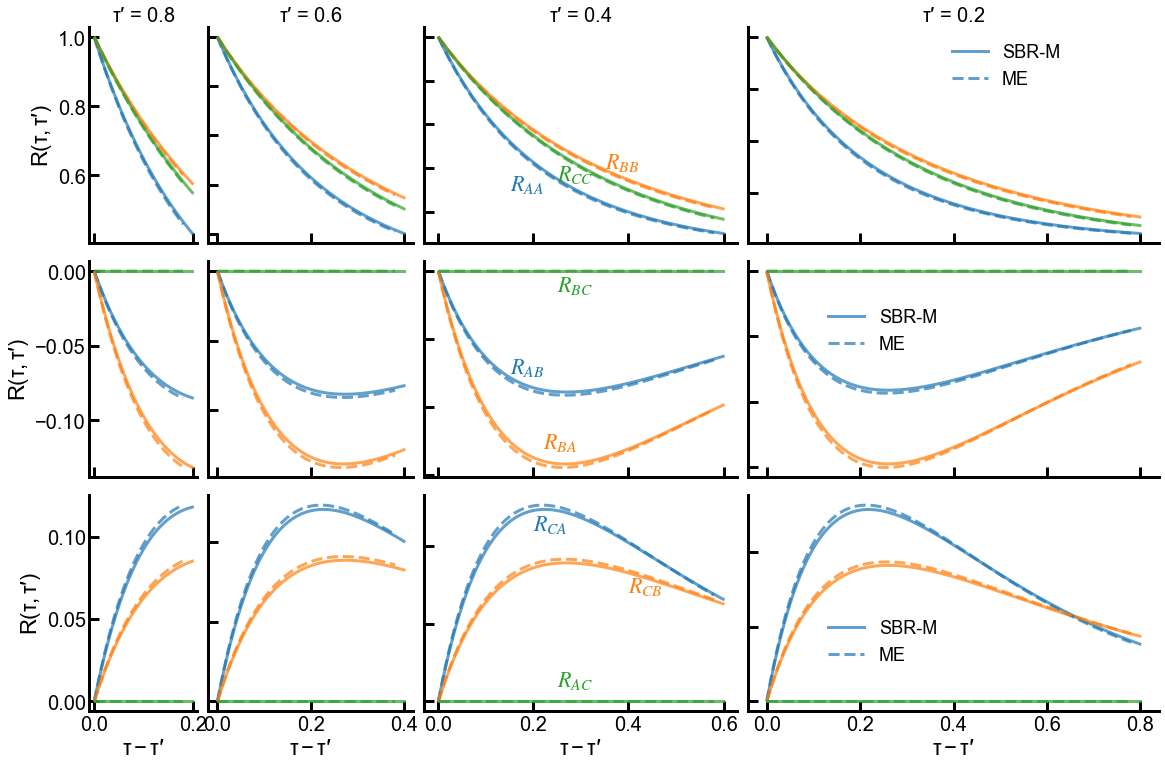

In [77]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_axes([0, 0.65, 0.1, 0.3])
ax2 = fig.add_axes([0.11, 0.65, 0.19, 0.3])
ax3 = fig.add_axes([0.31, 0.65, 0.29, 0.3])
ax4 = fig.add_axes([0.61, 0.65, 0.38, 0.3])

ax11 = fig.add_axes([0, 0.325, 0.1, 0.3])
ax22 = fig.add_axes([0.11, 0.325, 0.19, 0.3])
ax33 = fig.add_axes([0.31, 0.325, 0.29, 0.3])
ax44 = fig.add_axes([0.61, 0.325, 0.38, 0.3])

ax111 = fig.add_axes([0, 0., 0.1, 0.3])
ax222 = fig.add_axes([0.11, 0., 0.19, 0.3])
ax333 = fig.add_axes([0.31, 0., 0.29, 0.3])
ax444 = fig.add_axes([0.61, 0., 0.38, 0.3])

z=0
#axis= [ax1,ax2,ax3,ax4]
axis= [z,ax4,ax3,ax2,ax1]
axis11  = [z,ax44,ax33,ax22,ax11]
axis111 = [z,ax444,ax333,ax222,ax111]

skip=10
#for j in range(len(time_resp)):
#    axis[j].plot(sysEV_1.timeGrid[corr_tau_ALL[i,:,tau[j]]>0],corr_tau_ALL[i,corr_tau_ALL[i,:,tau[j]]>0,tau[j]]/corr_tau_ALL[i,0,tau[j]],'--')

for j in range(1,len(tau)):

    #axis[j].plot(time_grid_all[1:len(time_grid_all)-tau[j]],respME_2[1:len(time_grid_all)-tau[j],tau[j]],'.-',alpha=0.5)
    axis[j].plot(time_grid_ALL[1:len(time_grid_ALL)-tau[j]],respALL_2[0,0,1:len(time_grid_ALL)-tau[j],tau[j]],'-',alpha=0.7,label=r'SBR-M',c=cOL[0])
    axis[j].plot(time_grid_ALL[1:len(time_grid_ALL)-tau[j]],respALL_2[1,1,1:len(time_grid_ALL)-tau[j],tau[j]],'-',alpha=0.7,label=r'SBR-M $R_{BB}$',c=cOL[1])
    axis[j].plot(time_grid_ALL[1:len(time_grid_ALL)-tau[j]],respALL_2[2,2,1:len(time_grid_ALL)-tau[j],tau[j]],'-',alpha=0.7,label=r'SBR-M $R_{CC}$',c=cOL[2])
    
    axis[j].plot(sys_res.timeGrid[:len(sys_res.timeGrid)-tau2[j]-1],respME_2[0,0,1:len(sys_res.timeGrid)-tau2[j],tau2[j]],'--',alpha=0.7,label=r'ME',c=cOL[0])
    axis[j].plot(sys_res.timeGrid[:len(sys_res.timeGrid)-tau2[j]-1],respME_2[1,1,1:len(sys_res.timeGrid)-tau2[j],tau2[j]],'--',alpha=0.7,label=r'ME $R_{BB}$',c=cOL[1])
    axis[j].plot(sys_res.timeGrid[:len(sys_res.timeGrid)-tau2[j]-1],respME_2[2,2,1:len(sys_res.timeGrid)-tau2[j],tau2[j]],'--',alpha=0.7,label=r'ME $R_{CC}$',c=cOL[2])
    
    #axis[j].plot(time_grid_ALL[1:len(time_grid_ALL)-tau[j]],respLNA_2[0,0,1:len(time_grid_ALL)-tau[j],tau[j]],linestyle='dashdot',alpha=0.7,label=r'LNA',c=cOL[0])
    #axis[j].plot(time_grid_ALL[1:len(time_grid_ALL)-tau[j]],respLNA_2[1,1,1:len(time_grid_ALL)-tau[j],tau[j]],linestyle='dashdot',alpha=0.7,label=r'LNA $R_{BB}$',c=cOL[1])
    #axis[j].plot(time_grid_ALL[1:len(time_grid_ALL)-tau[j]],respLNA_2[2,2,1:len(time_grid_ALL)-tau[j],tau[j]],linestyle='dashdot',alpha=0.7,label=r'LNA $R_{CC}$',c=cOL[2])
    
    #axis[j].plot(sys_res.timeGrid[:len(sys_res.timeGrid)-tau2[j]-1],respME_2[0,0,1:len(sys_res.timeGrid)-tau2[j],tau2[j]],'--',alpha=0.95,label='Master Eqn',c=cOL[2])
    
    #axis[j].plot(time_grid_ALL[1:len(time_grid_ALL)-tau[j]:skip],respMAK_2[0,0,1:len(time_grid_ALL)-tau[j]:skip,tau[j]],'.',alpha=0.5,label=r'SBR $R_{AA}$',c=cOL[0])
    #axis[j].plot(time_grid_ALL[1:len(time_grid_ALL)-tau[j]:skip],respMAK_2[1,1,1:len(time_grid_ALL)-tau[j]:skip,tau[j]],'.',alpha=0.5,label=r'SBR $R_{BB}$',c=cOL[1])
    #axis[j].plot(time_grid_ALL[1:len(time_grid_ALL)-tau[j]:skip],respMAK_2[2,2,1:len(time_grid_ALL)-tau[j]:skip,tau[j]],'.',alpha=0.5,label=r'SBR $R_{CC}$',c=cOL[2])
    
    #axis[j].plot(time_grid_all[1:len(time_grid_all)-tau[j]],respMAK_2[1:len(time_grid_all)-tau[j],tau[j]],'--',alpha=0.5)
        
    axis[j].set_title(r'$\mathregular{\tau\prime}$ = '+str(tau[j]*0.001))
    
    axis[j].spines['right'].set_visible(False)
    axis[j].spines['top'].set_visible(False)
    #axis[j].set_ylim((-0.05,2.05))
    axis[j].set(xticklabels=[])
    
    axis11[j].plot(time_grid_ALL[1:len(time_grid_ALL)-tau[j]],respALL_2[0,1,1:len(time_grid_ALL)-tau[j],tau[j]],'-',alpha=0.7,label=r'SBR-M $R_{AB}$',c=cOL[0])
    axis11[j].plot(time_grid_ALL[1:len(time_grid_ALL)-tau[j]],respALL_2[1,0,1:len(time_grid_ALL)-tau[j],tau[j]],'-',alpha=0.7,label=r'SBR-M $R_{BA}$',c=cOL[1])
    axis11[j].plot(time_grid_ALL[1:len(time_grid_ALL)-tau[j]],respALL_2[1,2,1:len(time_grid_ALL)-tau[j],tau[j]],'-',alpha=0.7,label=r'SBR-M $R_{BC}$',c=cOL[2])
    
    axis11[j].plot(sys_res.timeGrid[:len(sys_res.timeGrid)-tau2[j]-1],respME_2[0,1,1:len(sys_res.timeGrid)-tau2[j],tau2[j]],'--',alpha=0.7,label=r'ME $R_{AB}$',c=cOL[0])
    axis11[j].plot(sys_res.timeGrid[:len(sys_res.timeGrid)-tau2[j]-1],respME_2[1,0,1:len(sys_res.timeGrid)-tau2[j],tau2[j]],'--',alpha=0.7,label=r'ME $R_{BA}$',c=cOL[1])
    axis11[j].plot(sys_res.timeGrid[:len(sys_res.timeGrid)-tau2[j]-1],respME_2[1,2,1:len(sys_res.timeGrid)-tau2[j],tau2[j]],'--',alpha=0.7,label=r'ME $R_{BC}$',c=cOL[2])
    
    #axis11[j].plot(time_grid_ALL[1:len(time_grid_ALL)-tau[j]],respLNA_2[0,1,1:len(time_grid_ALL)-tau[j],tau[j]],linestyle='dashdot',alpha=0.7,label=r'LNA $R_{AB}$',c=cOL[0])
    #axis11[j].plot(time_grid_ALL[1:len(time_grid_ALL)-tau[j]],respLNA_2[1,0,1:len(time_grid_ALL)-tau[j],tau[j]],linestyle='dashdot',alpha=0.7,label=r'LNA $R_{BA}$',c=cOL[1])
    #axis11[j].plot(time_grid_ALL[1:len(time_grid_ALL)-tau[j]],respLNA_2[1,2,1:len(time_grid_ALL)-tau[j],tau[j]],linestyle='dashdot',alpha=0.7,label=r'LNA $R_{BC}$',c=cOL[2])
    
    #axis11[j].plot(time_grid_ALL[1:len(time_grid_ALL)-tau[j]],respALL_2[2,2,1:len(time_grid_ALL)-tau[j],tau[j]],'.-',alpha=0.5)
    
    axis11[j].spines['right'].set_visible(False)
    axis11[j].spines['top'].set_visible(False)
    axis11[j].set(xticklabels=[])
    #axis11[j].set_ylim((-0.175,0.01))
    
    axis111[j].plot(time_grid_ALL[1:len(time_grid_ALL)-tau[j]],respALL_2[2,0,1:len(time_grid_ALL)-tau[j],tau[j]],'-',alpha=0.7,label=r'SBR-M $R_{CA}$',c=cOL[0])
    axis111[j].plot(time_grid_ALL[1:len(time_grid_ALL)-tau[j]],respALL_2[2,1,1:len(time_grid_ALL)-tau[j],tau[j]],'-',alpha=0.7,label=r'SBR-M $R_{CB}$',c=cOL[1])
    axis111[j].plot(time_grid_ALL[1:len(time_grid_ALL)-tau[j]],respALL_2[0,2,1:len(time_grid_ALL)-tau[j],tau[j]],'-',alpha=0.7,label=r'SBR-M $R_{AC}$',c=cOL[2])
    
    axis111[j].plot(sys_res.timeGrid[:len(sys_res.timeGrid)-tau2[j]-1],respME_2[2,0,1:len(sys_res.timeGrid)-tau2[j],tau2[j]],'--',alpha=0.7,label=r'ME $R_{CA}$',c=cOL[0])
    axis111[j].plot(sys_res.timeGrid[:len(sys_res.timeGrid)-tau2[j]-1],respME_2[2,1,1:len(sys_res.timeGrid)-tau2[j],tau2[j]],'--',alpha=0.7,label=r'ME $R_{CB}$',c=cOL[1])
    axis111[j].plot(sys_res.timeGrid[:len(sys_res.timeGrid)-tau2[j]-1],respME_2[0,2,1:len(sys_res.timeGrid)-tau2[j],tau2[j]],'--',alpha=0.7,label=r'ME $R_{AC}$',c=cOL[2])
    
    #axis111[j].plot(time_grid_ALL[1:len(time_grid_ALL)-tau[j]],respLNA_2[2,0,1:len(time_grid_ALL)-tau[j],tau[j]],linestyle='dashdot',alpha=0.7,label=r'LNA $R_{CA}$',c=cOL[0])
    #axis111[j].plot(time_grid_ALL[1:len(time_grid_ALL)-tau[j]],respLNA_2[2,1,1:len(time_grid_ALL)-tau[j],tau[j]],linestyle='dashdot',alpha=0.7,label=r'LNA $R_{CB}$',c=cOL[1])
    #axis111[j].plot(time_grid_ALL[1:len(time_grid_ALL)-tau[j]],respLNA_2[0,2,1:len(time_grid_ALL)-tau[j],tau[j]],linestyle='dashdot',alpha=0.7,label=r'LNA $R_{AC}$',c=cOL[2])
    
    #axis11[j].plot(time_grid_ALL[1:len(time_grid_ALL)-tau[j]],respALL_2[2,2,1:len(time_grid_ALL)-tau[j],tau[j]],'.-',alpha=0.5)
    
    axis111[j].spines['right'].set_visible(False)
    axis111[j].spines['top'].set_visible(False)
    #axis111[j].set_ylim((-0.01,0.15))
    
    axis111[j].set_xlabel(r'$\mathregular{\tau-\tau\prime}$',fontsize=22)

ax1_handles, ax1_labels     = ax1.get_legend_handles_labels()
ax11_handles, ax11_labels   = ax11.get_legend_handles_labels()
ax111_handles, ax111_labels = ax111.get_legend_handles_labels()

ax1.set_ylabel(r'$\mathregular{R(\tau,\tau\prime)}$',fontsize=22)
ax2.set(yticklabels=[])
ax3.set(yticklabels=[])
ax4.set(yticklabels=[])

ax11.set_ylabel(r'$\mathregular{R(\tau,\tau\prime)}$',fontsize=22)
ax22.set(yticklabels=[])
ax33.set(yticklabels=[])
ax44.set(yticklabels=[])

ax111.set_ylabel(r'$\mathregular{R(\tau,\tau\prime)}$',fontsize=22)
ax222.set(yticklabels=[])
ax333.set(yticklabels=[])
ax444.set(yticklabels=[])

ax4.legend([ax1_handles[0],ax1_handles[3]],[ax1_labels[0],ax1_labels[3]],bbox_to_anchor=(0.8,1), frameon=False, fontsize=18,ncol=1)

#ax44.legend([ax1_handles[0],ax1_handles[3],ax1_handles[6]],[ax1_labels[0],ax1_labels[3],ax1_labels[6]],bbox_to_anchor=(0.5,0.5), frameon=False, fontsize=18,ncol=1)

ax44.legend([ax1_handles[0],ax1_handles[3]],[ax1_labels[0],ax1_labels[3]],bbox_to_anchor=(0.5,0.5), frameon=False, fontsize=18,ncol=1)

#ax444.legend([ax1_handles[0],ax1_handles[3],ax1_handles[6]],[ax1_labels[0],ax1_labels[3],ax1_labels[6]],bbox_to_anchor=(0.5,0.5), frameon=False, fontsize=18,ncol=1)

ax444.legend([ax1_handles[0],ax1_handles[3]],[ax1_labels[0],ax1_labels[3]],bbox_to_anchor=(0.5,0.5), frameon=False, fontsize=18,ncol=1)


ax3.text(0.15, 0.3, r'$R_{AA}$', color=cOL[0],fontsize=22)
ax3.text(0.35, 0.4, r'$R_{BB}$', color=cOL[1],fontsize=22)
ax3.text(0.25, 0.345, r'$R_{CC}$', color=cOL[2],fontsize=22)

ax33.text(0.15, -0.075, r'$R_{AB}$', color=cOL[0],fontsize=22)
ax33.text(0.22, -0.13, r'$R_{BA}$', color=cOL[1],fontsize=22)
ax33.text(0.25, -0.015, r'$R_{BC}$', color=cOL[2],fontsize=22)

ax333.text(0.2, 0.11, r'$R_{CA}$', color=cOL[0],fontsize=22)
ax333.text(0.4, 0.07, r'$R_{CB}$', color=cOL[1],fontsize=22)
ax333.text(0.25, 0.01, r'$R_{AC}$', color=cOL[2],fontsize=22)
